In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


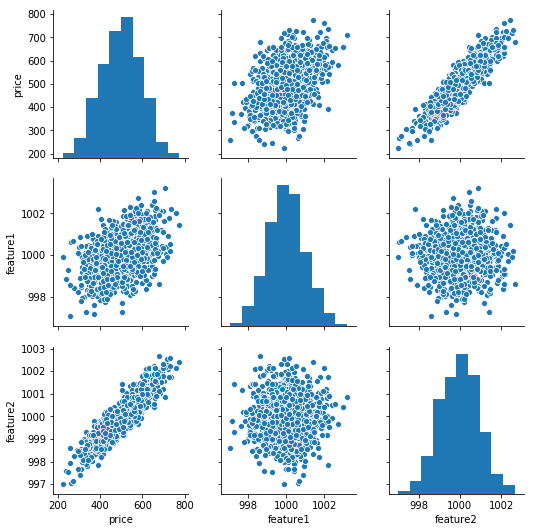

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
#help(MinMaxScaler)

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
X_train=scaler.transform(X_train)

In [16]:
X_test=scaler.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense

In [21]:
#help(Sequential)

In [25]:
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [26]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
700/700 [==============================] - 2s 2ms/sample - loss: 256700.9284
Epoch 2/250
700/700 [==============================] - 0s 97us/sample - loss: 256648.0490
Epoch 3/250
700/700 [==============================] - 0s 98us/sample - loss: 256591.8076
Epoch 4/250
700/700 [==============================] - 0s 108us/sample - loss: 256533.8095
Epoch 5/250
700/700 [==============================] - 0s 110us/sample - loss: 256472.4362
Epoch 6/250
700/700 [==============================] - 0s 105us/sample - loss: 256403.9017
Epoch 7/250
700/700 [==============================] - 0s 105us/sample - loss: 256326.7109
Epoch 8/250
700/700 [==============================] - 0s 100us/sample - loss: 256239.9993
Epoch 9/250
700/700 [==============================] - 0s 114us/sample - loss: 256142.7320
Epoch 10/250
700/700 [==============================] - 0s 97us/sample - loss: 256035.0434
Epoch 11/250
700/700 [==============================] - 0s 139us/sample - loss: 255914.6982
Ep

700/700 [==============================] - 0s 144us/sample - loss: 108501.5372
Epoch 90/250
700/700 [==============================] - 0s 137us/sample - loss: 104085.9891
Epoch 91/250
700/700 [==============================] - 0s 123us/sample - loss: 99649.6993
Epoch 92/250
700/700 [==============================] - 0s 138us/sample - loss: 95175.8657
Epoch 93/250
700/700 [==============================] - 0s 130us/sample - loss: 90716.3453
Epoch 94/250
700/700 [==============================] - 0s 128us/sample - loss: 86251.3892
Epoch 95/250
700/700 [==============================] - 0s 128us/sample - loss: 81794.5721
Epoch 96/250
700/700 [==============================] - 0s 136us/sample - loss: 77337.7915
Epoch 97/250
700/700 [==============================] - 0s 138us/sample - loss: 72887.1739
Epoch 98/250
700/700 [==============================] - 0s 131us/sample - loss: 68461.6532
Epoch 99/250
700/700 [==============================] - 0s 126us/sample - loss: 64042.7921
Epoch 100/

700/700 [==============================] - 0s 120us/sample - loss: 577.5559
Epoch 180/250
700/700 [==============================] - 0s 105us/sample - loss: 563.5472
Epoch 181/250
700/700 [==============================] - 0s 91us/sample - loss: 548.2997
Epoch 182/250
700/700 [==============================] - 0s 96us/sample - loss: 533.0924
Epoch 183/250
700/700 [==============================] - 0s 103us/sample - loss: 520.3191
Epoch 184/250
700/700 [==============================] - 0s 102us/sample - loss: 507.3128
Epoch 185/250
700/700 [==============================] - 0s 93us/sample - loss: 495.4764
Epoch 186/250
700/700 [==============================] - 0s 74us/sample - loss: 481.8349
Epoch 187/250
700/700 [==============================] - 0s 76us/sample - loss: 469.6278
Epoch 188/250
700/700 [==============================] - 0s 83us/sample - loss: 458.4057
Epoch 189/250
700/700 [==============================] - 0s 91us/sample - loss: 445.4919
Epoch 190/250
700/700 [========

In [28]:
loss_df=pd.DataFrame(model.history.history)

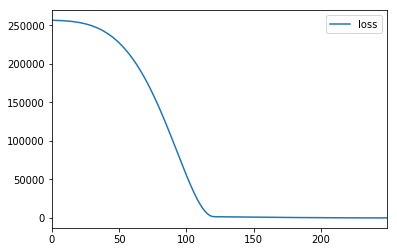

In [29]:
loss_df.plot()

In [30]:
model.evaluate(X_test,y_test,verbose=0)

33.27533411661784

In [31]:
model.evaluate(X_train,y_train,verbose=0)

32.927653525216236

In [32]:
test_predictions=model.predict(X_test)

In [39]:
#test_predictions

In [40]:
test_predictions=pd.Series(test_predictions.values.reshape(300,))
#test_predictions

In [41]:
pred_df=pd.DataFrame(y_test,columns=['Test True Y'])

In [42]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [44]:
pred_df.columns=['Test True Y','Model Predictions']

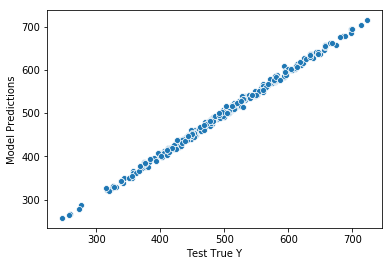

In [48]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.729335459408883

In [51]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

33.27534135581063

In [52]:
np.sqrt(mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']))

5.7684782530413194

In [57]:
new_gem=[998,1000]

In [58]:
mew_gem=scaler.transform(new_gem)

ValueError: Expected 2D array, got 1D array instead:
array=[ 998. 1000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [59]:
model.predict(new_gem)

InvalidArgumentError: Matrix size-incompatible: In[0]: [2,1], In[1]: [2,4]
	 [[{{node sequential_3/dense_10/MatMul}}]]